In [1]:
import seaborn as sns
import pandas as pd
import glob
import os

# This is a commnet. The line the follows allows for inline plotting. i.e. your plots will show up in these boxes.
%matplotlib inline

from IPython.display import Image

In [2]:
path = '/Users/ara/Documents/bat_metagenomes/' 

In [3]:
my_dir = path
filelist = []
filesList = []
os.chdir( my_dir )

In [4]:
for files in glob.glob("*.krakenreport.txt"):
    #fileName, fileExtension = os.path.splitext(files)
    filelist.append(filesList) #filename without extension
    filesList.append(files) #filename with extension

In [5]:
df = pd.DataFrame()
for ijk in filesList:
    frame = pd.read_csv(ijk,skiprows=0, skipfooter=0,sep="\t" ,delim_whitespace=False,
                      engine='python',header=None)
    frame['sample_id']=ijk
    df = df.append(frame) 

In [6]:
df.head(3)

,0,1,2,3,4,5,sample_id
0,99.21,1402433,1402433,U,0,unclassified,CC140620_1.krakenreport.txt
1,0.79,11199,2660,-,1,root,CC140620_1.krakenreport.txt
2,0.50,7099,61,-,131567,cellular organisms,CC140620_1.krakenreport.txt


In [43]:
df.columns = ['percent_reads', 'reads_at_root','reads','rank','tax_id','full_tax','sample_id']
df.head(3)

,percent_reads,reads_at_root,reads,rank,tax_id,full_tax,sample_id
0,99.21,1402433,1402433,U,0,unclassified,CC140620_1.krakenreport.txt
1,0.79,11199,2660,-,1,root,CC140620_1.krakenreport.txt
2,0.50,7099,61,-,131567,cellular organisms,CC140620_1.krakenreport.txt


### Phylum level

In [8]:
phylum_level = df.loc[df['rank'] == 'P']

In [41]:
phylum_level.head(3)

,percent_reads,reads_at_root,reads,rank,tax_id,full_tax,sample_id
4,0.14,2034,104,P,1224,Proteobacteria,CC140620_1.krakenreport.txt
761,0.14,1916,0,P,201174,Actinobacteria,CC140620_1.krakenreport.txt
1055,0.10,1365,20,P,1239,Firmicutes,CC140620_1.krakenreport.txt


In [10]:
phylum_level_pivot = phylum_level.pivot_table(index='sample_id', columns='full_tax', values='reads_at_root')

In [21]:
phylum_level_t = phylum_level_pivot.transpose()

In [22]:
phylum_level_t.head(3)

sample_id,CC140620_1.krakenreport.txt,CC140620_25.krakenreport.txt,CC140620_33.krakenreport.txt,CC140620_37.krakenreport.txt,CC140620_5.krakenreport.txt
full_tax,,,,,
Acidobacteria,4.0,2.0,2.0,4.0,3.0
Bacteroidetes,792.0,756.0,486.0,438.0,1051.0
Candidatus Saccharibacteria,48.0,33.0,9.0,10.0,55.0


In [27]:
phylum_level_t.rename(columns=lambda x: x.replace('.krakenreport.txt', ''), inplace=True)
phylum_level_t.head(3)
phylum_level_t['full_taxa'] = phylum_level_t.index

In [28]:
#list(phylum_level_t.index.values)

In [29]:
# Function to return N values from a series
def sorted(s, num):
    tmp = s.sort_values(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

In [30]:
phylum_top_10_taxa = phylum_level_t.apply(lambda x: sorted(x, 10))

In [31]:
phylum_top_10_taxa.head(3)

sample_id,CC140620_1,CC140620_25,CC140620_33,CC140620_37,CC140620_5,full_taxa
0,2034.0,3167.0,1780.0,2802.0,5999.0,Thermotogae
1,1916.0,1799.0,1072.0,2102.0,1939.0,Thermodesulfobacteria
2,1365.0,756.0,486.0,691.0,1051.0,Thaumarchaeota


In [33]:
indexed_df = phylum_top_10_taxa.set_index(['full_taxa'])

In [38]:
df_top_rel = indexed_df/phylum_level_t.sum(numeric_only=True)

In [39]:
df_top_rel.head(3)

sample_id,CC140620_1,CC140620_25,CC140620_33,CC140620_37,CC140620_5
full_taxa,,,,,
Thermotogae,0.313695,0.424360,0.462458,0.382265,0.566799
Thermodesulfobacteria,0.295497,0.241056,0.278514,0.286767,0.183201
Thaumarchaeota,0.210518,0.101300,0.126267,0.094270,0.099301


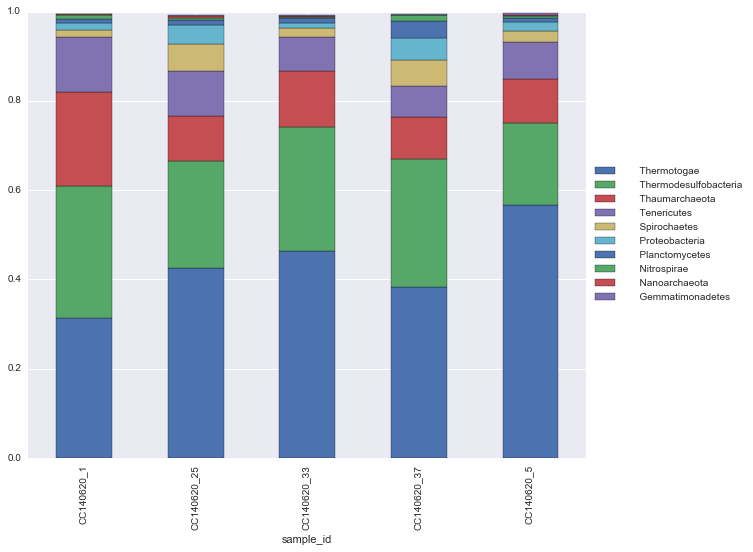

In [40]:
df_top_rel_t = df_top_rel.transpose()
p1 = df_top_rel_t.plot(kind='bar',stacked=True)
p1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
p1.figure.set_size_inches(10,8)

### Virus 

In [44]:
virus_df = df[df['full_tax'].str.contains("viridae","Pandoravirus")]

In [46]:
virus_df.head(10)

,percent_reads,reads_at_root,reads,rank,tax_id,full_tax,sample_id
1792,0.02,216,0,F,548682,Alloherpesviridae,CC140620_1.krakenreport.txt
1798,0.01,138,1,F,10292,Herpesviridae,CC140620_1.krakenreport.txt
1823,0.00,45,0,F,10744,Podoviridae,CC140620_1.krakenreport.txt
